In [3]:
import os
import cv2
import numpy as np
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

In [4]:
# Check if directories exist
img_dir = "Main"
mask_dir = "Masked"

# List files in the directories
print("Images Directory Files:", os.listdir(img_dir)[:5])  # Print first 5 image files
print("Masks Directory Files:", os.listdir(mask_dir)[:5])  # Print first 5 mask files

Images Directory Files: ['0.jpg', '1.jpg', '10.jpg', '11.jpg', '12.jpg']
Masks Directory Files: ['00000_hair.png', '00000_l_brow.png', '00000_l_eye.png', '00000_l_lip.png', '00000_mouth.png']


In [5]:
classes = []

for main_file in os.listdir(img_dir):
    prefix = main_file.split(".",1)[0]
    for file in os.listdir(mask_dir):
        if file.startswith(f"0000{prefix}_"):
            class_name = file.split("_",1)[1]
            class_name = class_name.split(".")[0]
            if class_name not in classes:
                classes.append(class_name)

print(classes)
print(len(classes))

['hair', 'l_brow', 'l_eye', 'l_lip', 'mouth', 'neck', 'nose', 'r_brow', 'r_eye', 'skin', 'u_lip', 'cloth', 'l_ear', 'r_ear', 'ear_r', 'hat']
16


In [6]:
classes = ['hair', 'l_brow', 'l_eye', 'l_lip', 'mouth', 'neck', 'nose', 'r_brow', 'r_eye', 'skin', 'u_lip', 'cloth', 'l_ear', 'r_ear', 'ear_r', 'hat']
len(classes)

features = {
    'eyes': ['l_eye', 'r_eye'],
    'ear': ['l_ear', 'r_ear'],
    'brow': ['l_brow', 'r_brow'],
    'mouth': ['l_lip', 'r_lip', 'mouth'],
    'neck': ['neck'],
    'nose': ['nose'],
    'skin': ['skin']
}

Prefix: 0, Mean: 69.71100616455078, Std: 57.188865661621094


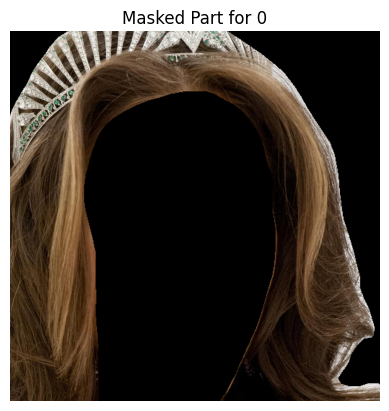

Prefix: 0, Mean: 67.43719482421875, Std: 42.57820510864258


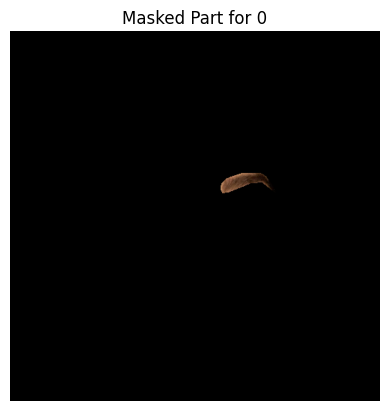

Prefix: 0, Mean: 37.14879608154297, Std: 32.76782989501953


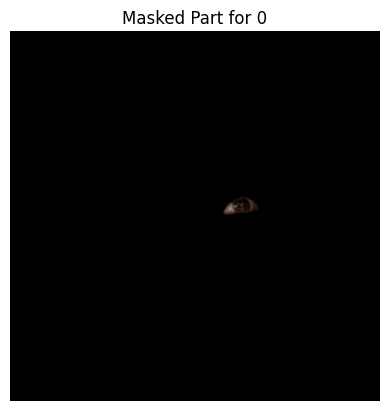

Prefix: 0, Mean: 106.62971496582031, Std: 55.689937591552734


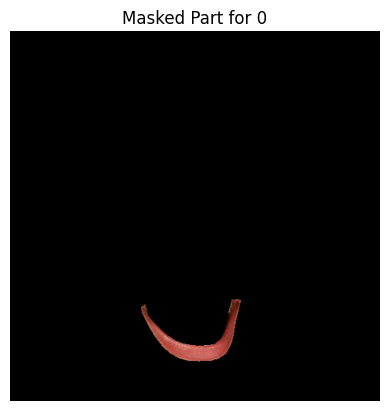

Prefix: 0, Mean: 105.49629211425781, Std: 64.30840301513672


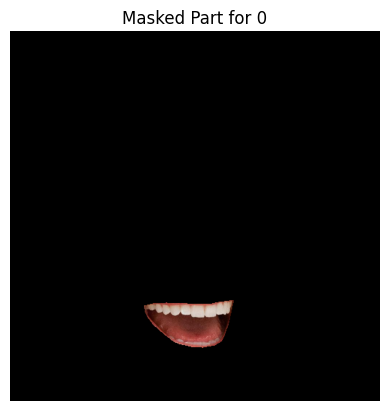

Prefix: 0, Mean: 47.93162536621094, Std: 38.09585189819336


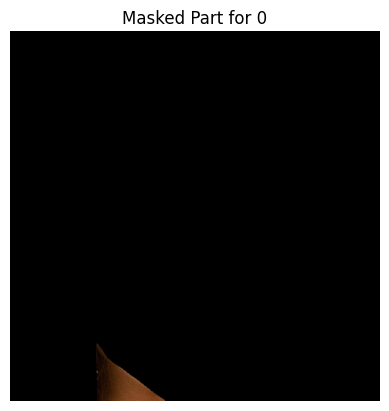

Prefix: 0, Mean: 150.8313446044922, Std: 46.139888763427734


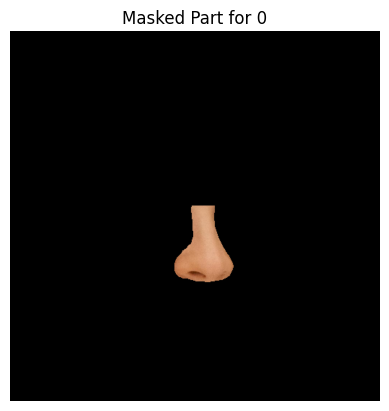

Prefix: 0, Mean: 87.45750427246094, Std: 38.729793548583984


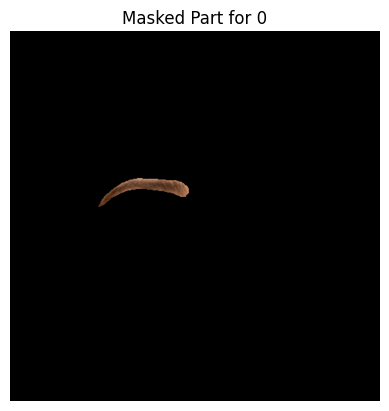

Prefix: 0, Mean: 42.00730514526367, Std: 29.615703582763672


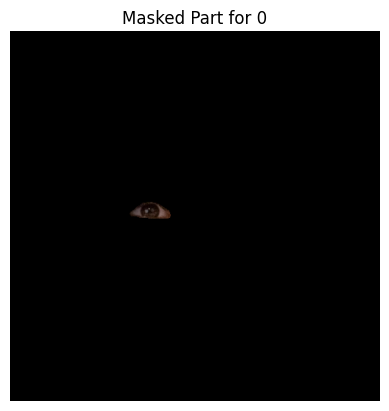

Prefix: 0, Mean: 121.18644714355469, Std: 56.03907012939453


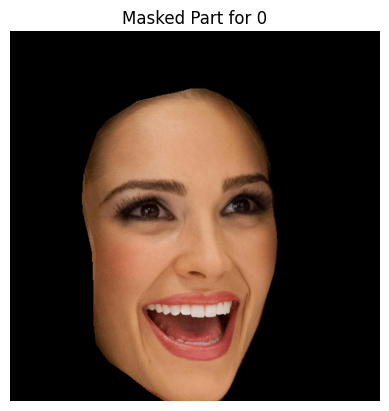

Prefix: 0, Mean: 120.64105987548828, Std: 51.71683883666992


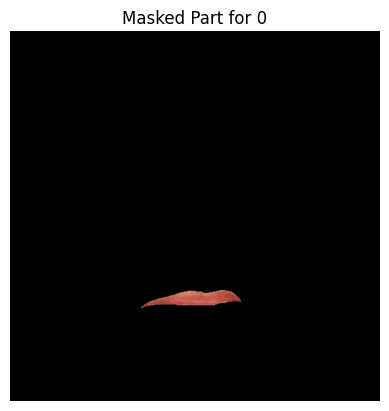

Prefix: 1, Mean: 194.5812530517578, Std: 43.26683044433594


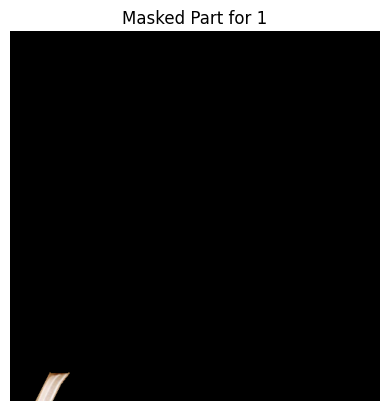

Prefix: 1, Mean: 146.0942840576172, Std: 55.1904182434082


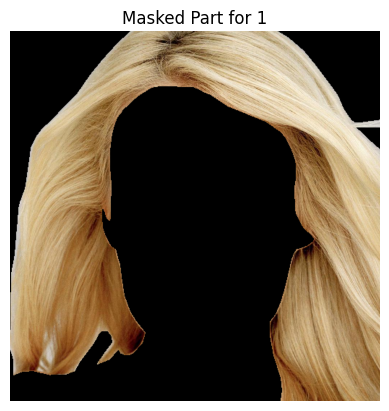

Prefix: 1, Mean: 137.06153869628906, Std: 42.59957504272461


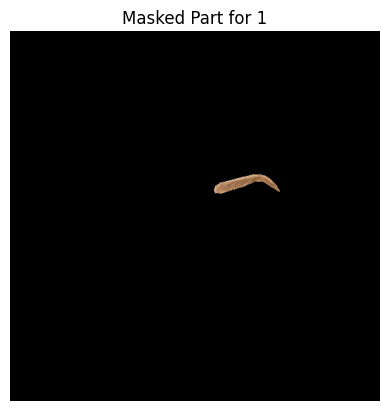

Prefix: 1, Mean: 117.69586944580078, Std: 45.64018630981445


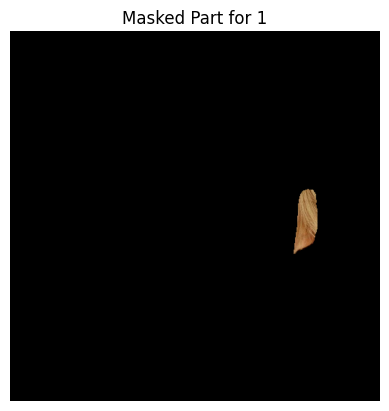

Prefix: 1, Mean: 115.88880920410156, Std: 64.51683807373047


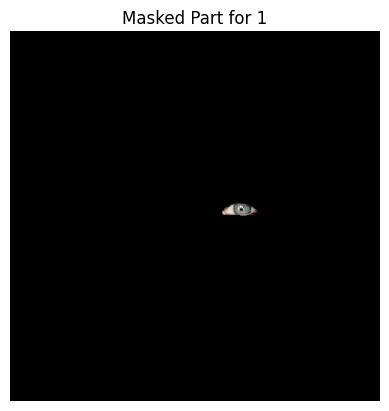

Prefix: 1, Mean: 138.93826293945312, Std: 55.13113021850586


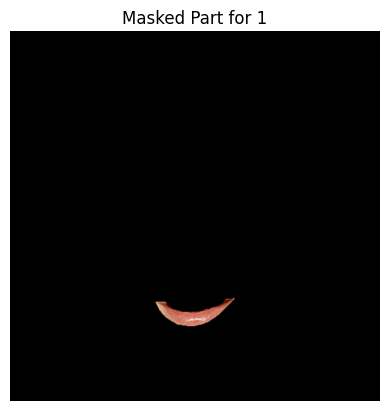

Prefix: 1, Mean: 139.9677734375, Std: 75.64185333251953


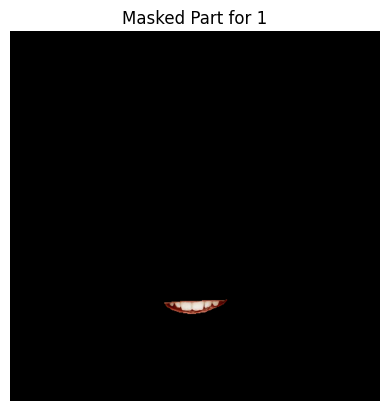

Prefix: 1, Mean: 165.40493774414062, Std: 43.732078552246094


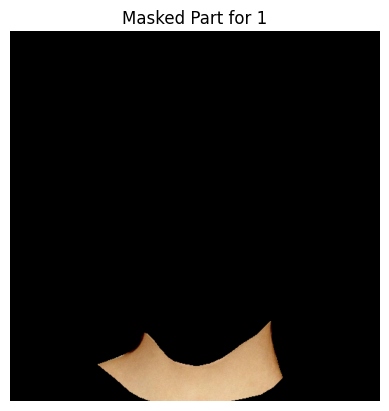

Prefix: 1, Mean: 184.42507934570312, Std: 34.946712493896484


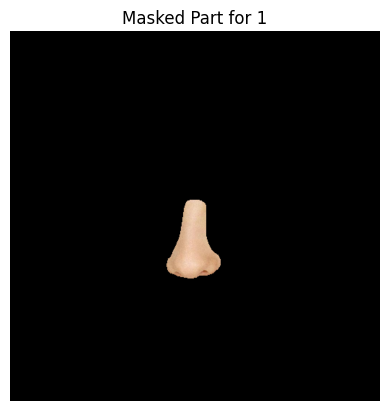

Prefix: 1, Mean: 129.18617248535156, Std: 42.4872932434082


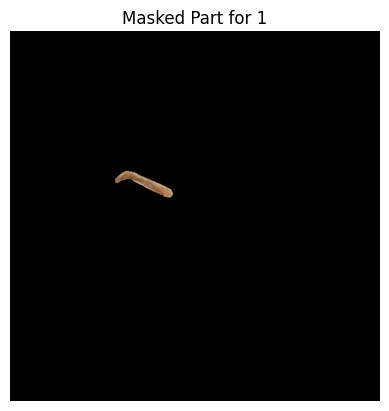

Prefix: 1, Mean: 99.3377456665039, Std: 49.06827163696289


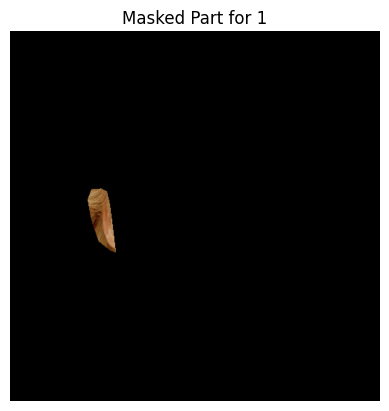

Prefix: 1, Mean: 122.85506439208984, Std: 56.697086334228516


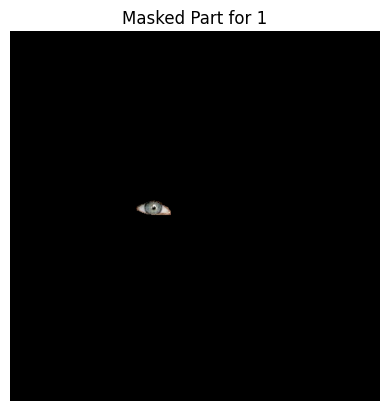

Prefix: 1, Mean: 170.30453491210938, Std: 45.62576675415039


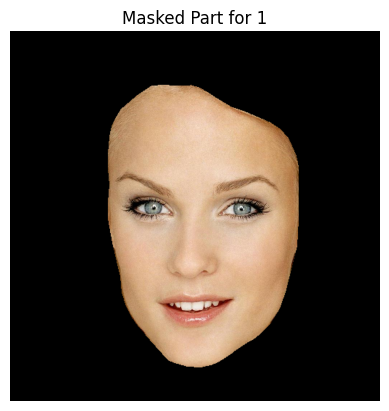

Prefix: 1, Mean: 151.6951446533203, Std: 48.8726692199707


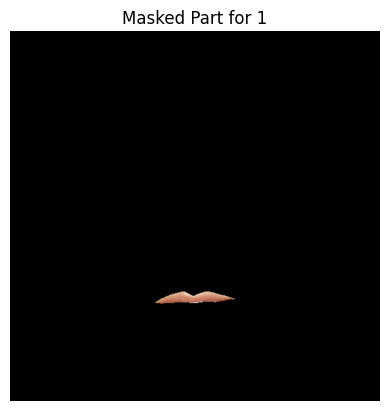

Prefix: 2, Mean: 72.15428924560547, Std: 69.2846908569336


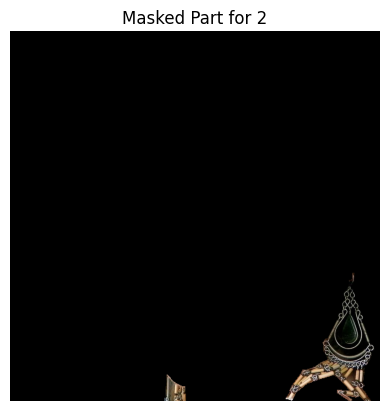

Prefix: 2, Mean: 49.75017166137695, Std: 43.51168441772461


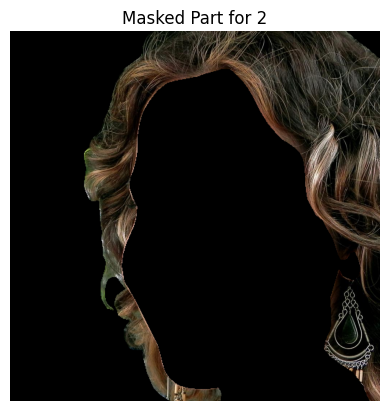

Prefix: 2, Mean: 126.92762756347656, Std: 39.28776931762695


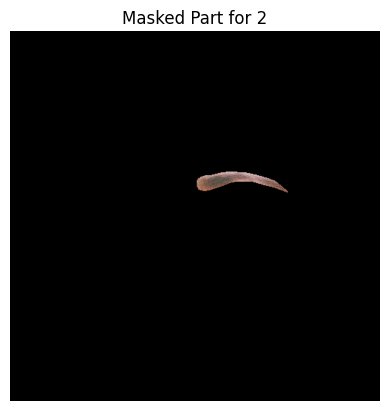

Prefix: 2, Mean: 35.9622802734375, Std: 33.8857421875


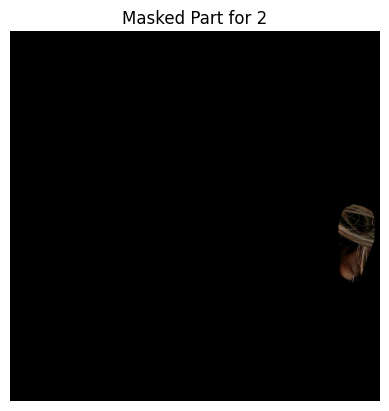

Prefix: 2, Mean: 104.6373519897461, Std: 66.74923706054688


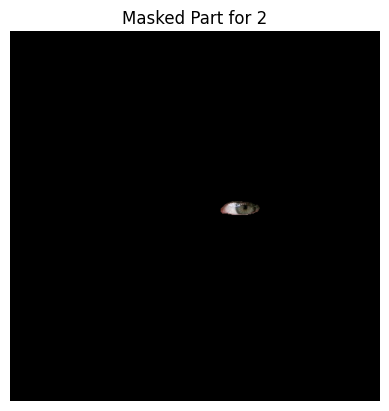

Prefix: 2, Mean: 152.41932678222656, Std: 52.485538482666016


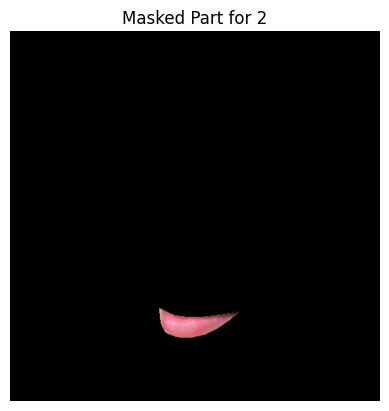

Prefix: 2, Mean: 102.83826446533203, Std: 52.62539291381836


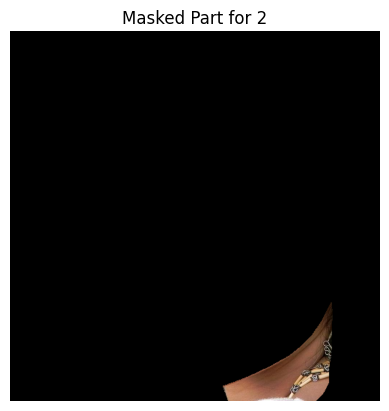

Prefix: 2, Mean: 182.05502319335938, Std: 42.281654357910156


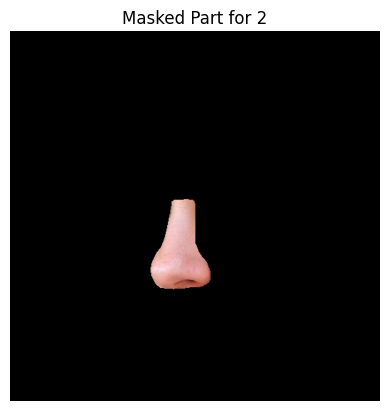

Prefix: 2, Mean: 104.55199432373047, Std: 36.43507385253906


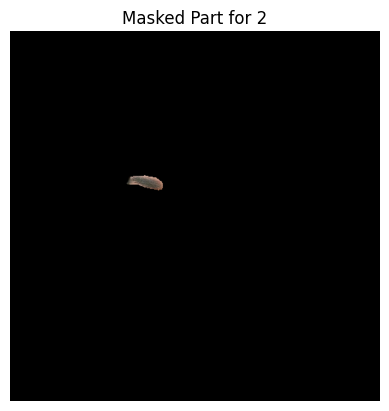

Prefix: 2, Mean: 106.44871520996094, Std: 65.83659362792969


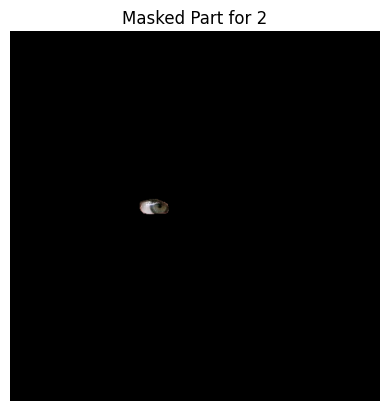

Prefix: 2, Mean: 155.44390869140625, Std: 52.72862243652344


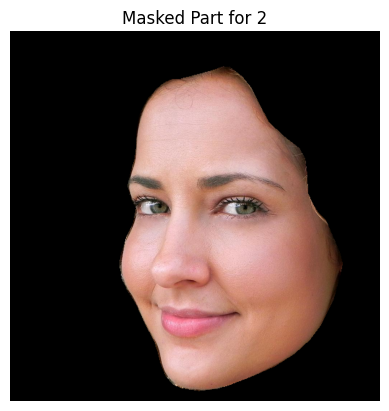

Prefix: 2, Mean: 136.12086486816406, Std: 48.530338287353516


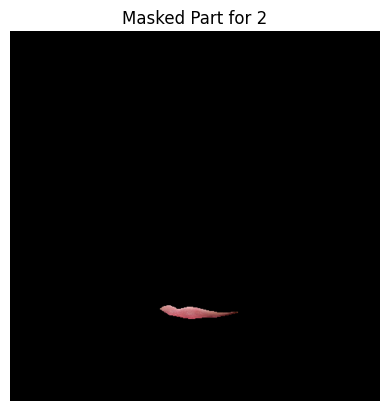

Prefix: 3, Mean: 28.926958084106445, Std: 16.899797439575195


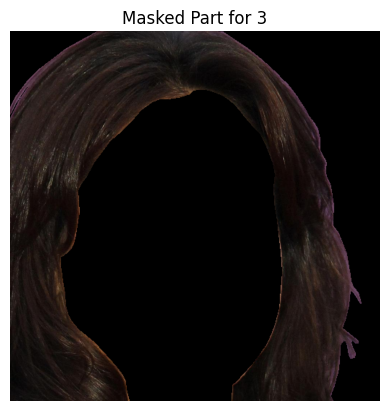

Prefix: 3, Mean: 60.55820846557617, Std: 38.97423553466797


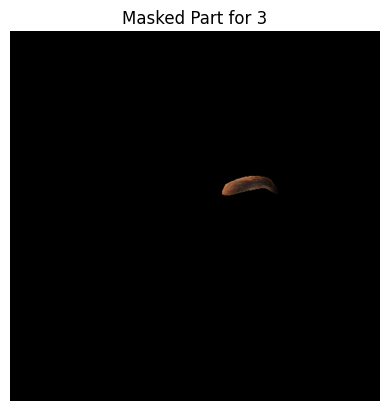

Prefix: 3, Mean: 52.51675033569336, Std: 38.125858306884766


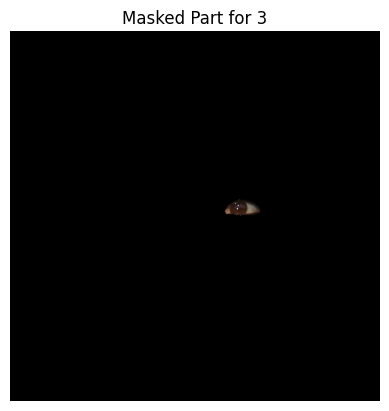

Prefix: 3, Mean: 129.4972381591797, Std: 52.379661560058594


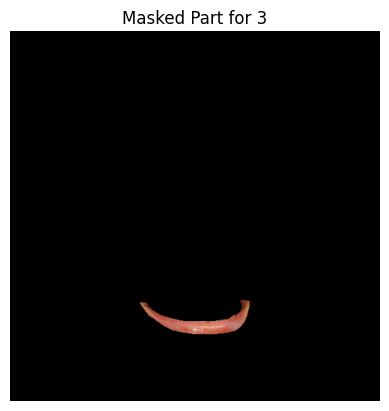

Prefix: 3, Mean: 141.34471130371094, Std: 53.28531265258789


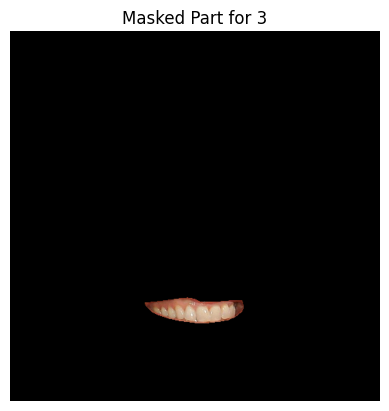

Prefix: 3, Mean: 86.2258529663086, Std: 43.7781982421875


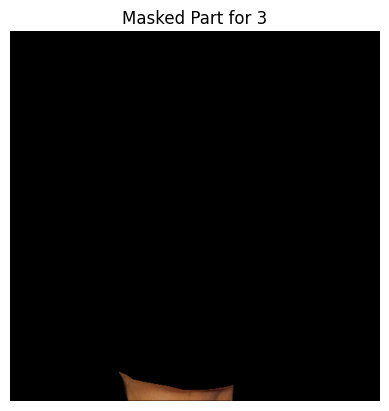

Prefix: 3, Mean: 138.57167053222656, Std: 48.86103820800781


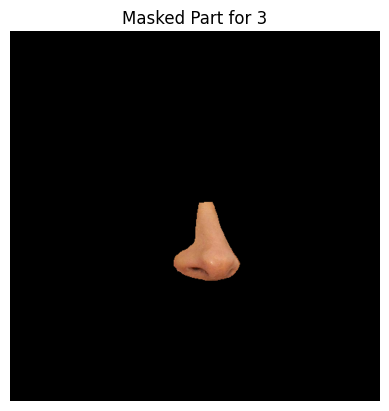

Prefix: 3, Mean: 78.2115707397461, Std: 37.49396514892578


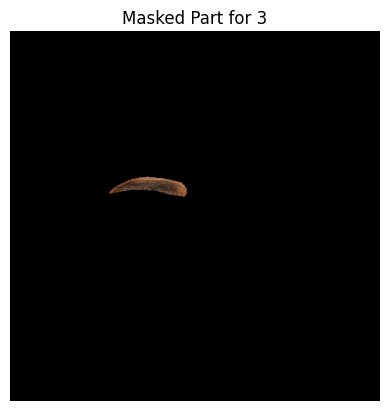

Prefix: 3, Mean: 54.60296630859375, Std: 41.23005676269531


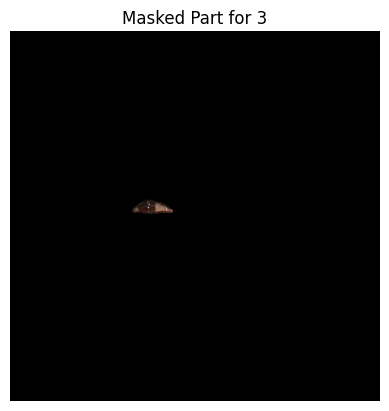

Prefix: 3, Mean: 117.96356964111328, Std: 54.45541000366211


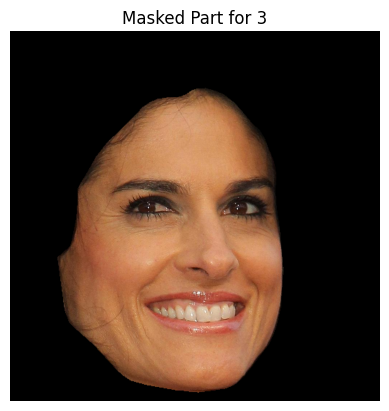

Prefix: 3, Mean: 103.86803436279297, Std: 53.56217575073242


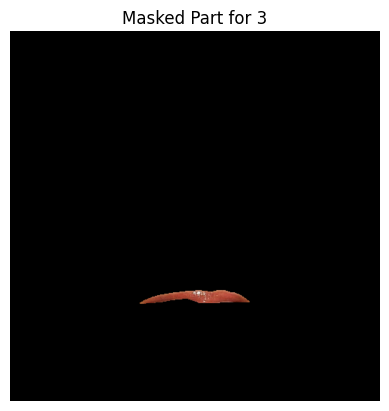

Prefix: 4, Mean: 136.58792114257812, Std: 59.14881134033203


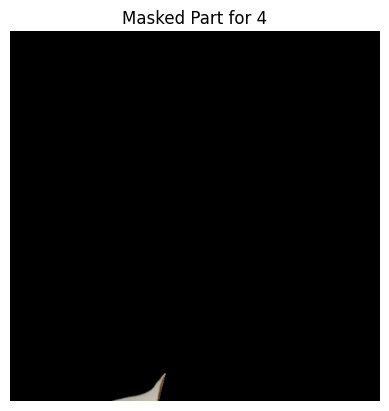

Prefix: 4, Mean: 66.02706909179688, Std: 53.36140823364258


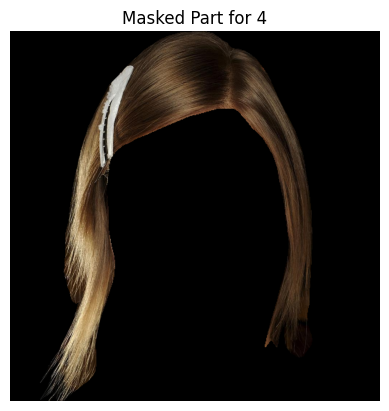

Prefix: 4, Mean: 97.6066665649414, Std: 44.477298736572266


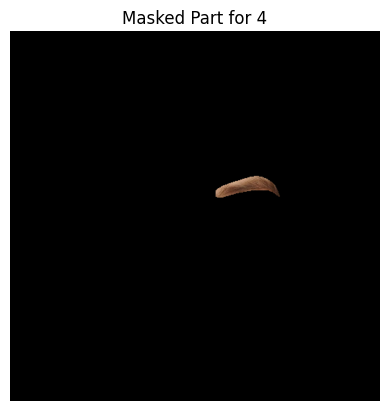

Prefix: 4, Mean: 49.933868408203125, Std: 26.27521514892578


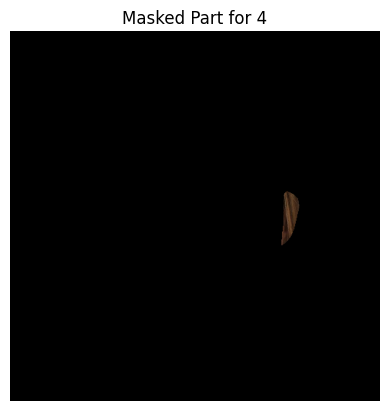

Prefix: 4, Mean: 89.06053924560547, Std: 62.093605041503906


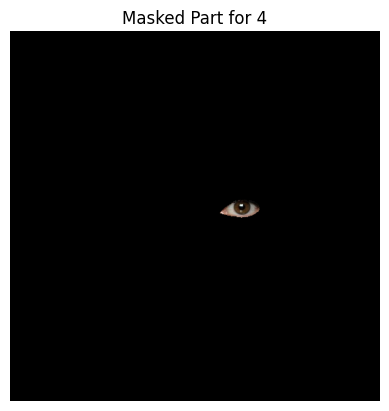

Prefix: 4, Mean: 115.4219970703125, Std: 51.40720748901367


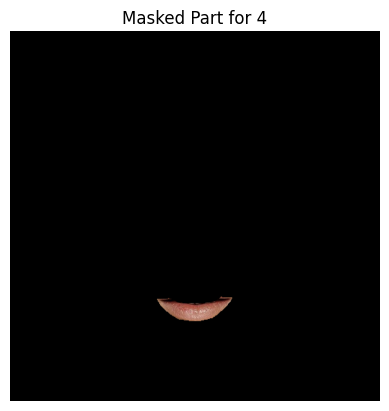

Prefix: 4, Mean: 65.40921783447266, Std: 40.81622314453125


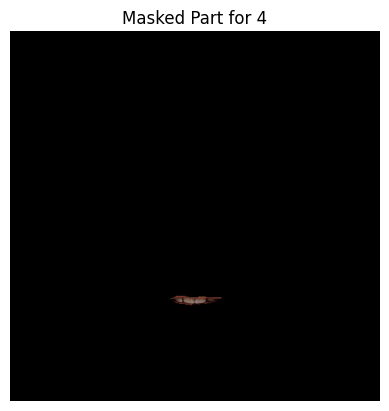

Prefix: 4, Mean: 95.11250305175781, Std: 43.245296478271484


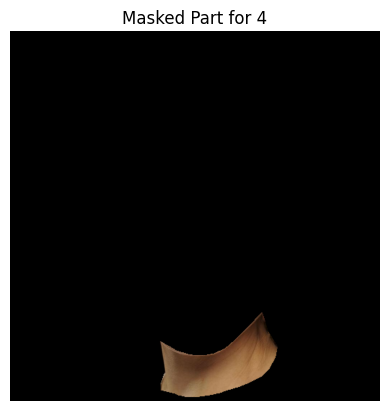

Prefix: 4, Mean: 147.91163635253906, Std: 45.18303680419922


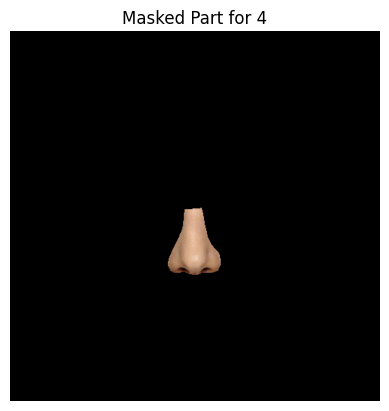

Prefix: 4, Mean: 94.43661499023438, Std: 42.04261779785156


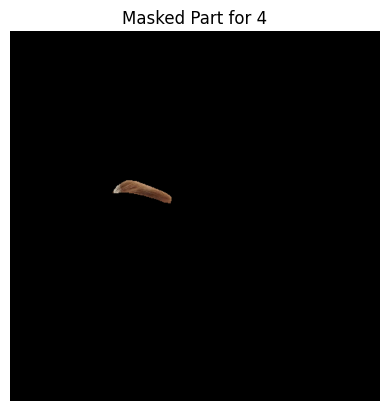

Prefix: 4, Mean: 81.1810302734375, Std: 60.02107620239258


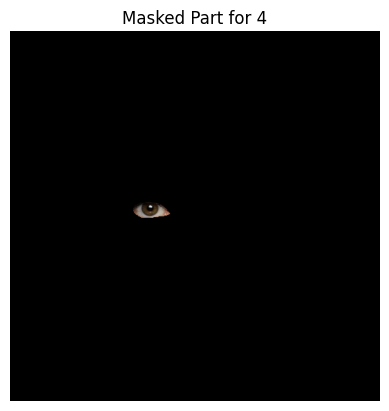

Prefix: 4, Mean: 135.9015350341797, Std: 51.43086624145508


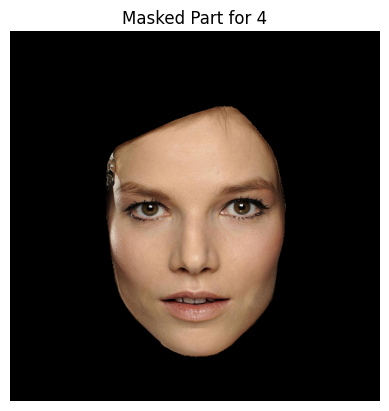

Prefix: 4, Mean: 112.62052154541016, Std: 49.6646614074707


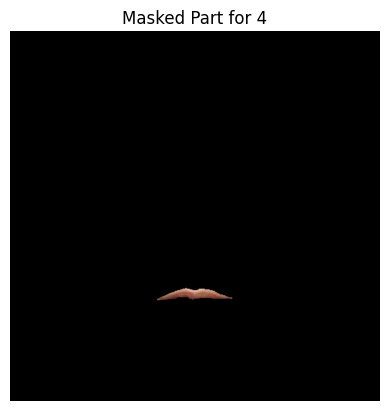

Prefix: 5, Mean: 116.93624877929688, Std: 48.182945251464844


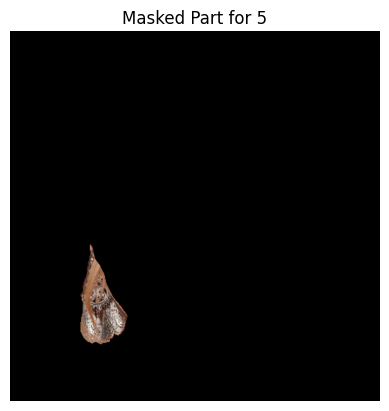

Prefix: 5, Mean: 97.11813354492188, Std: 45.11818313598633


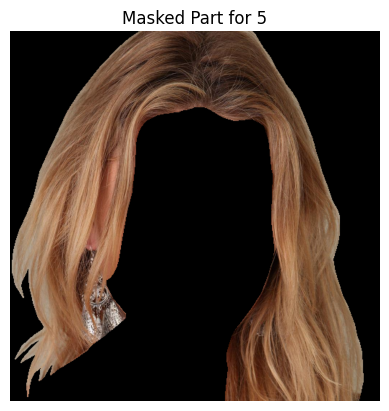

Prefix: 5, Mean: 85.75916290283203, Std: 37.61964416503906


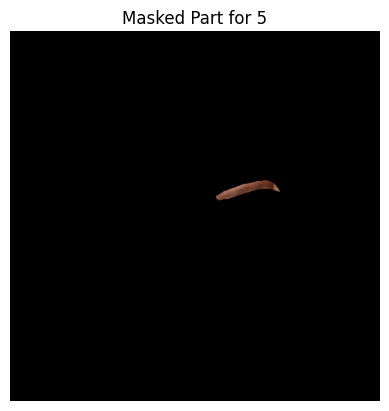

Prefix: 5, Mean: 87.3288803100586, Std: 44.184837341308594


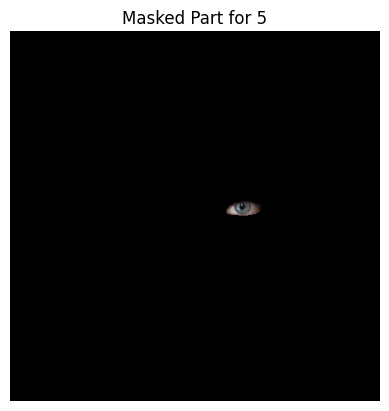

Prefix: 5, Mean: 121.56285858154297, Std: 50.40877914428711


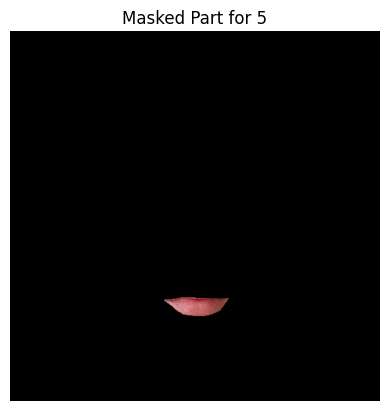

Prefix: 5, Mean: 137.89828491210938, Std: 50.25572204589844


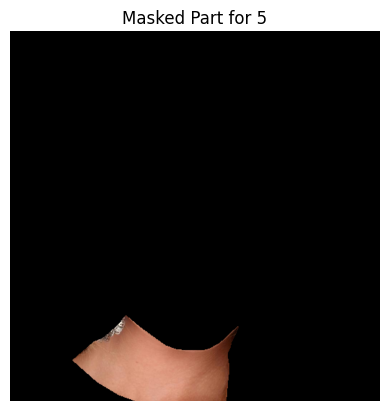

Prefix: 5, Mean: 151.83221435546875, Std: 47.345359802246094


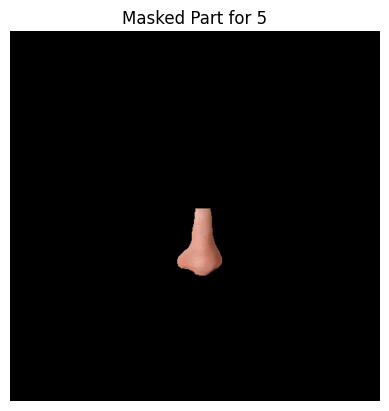

Prefix: 5, Mean: 108.23692321777344, Std: 44.79109573364258


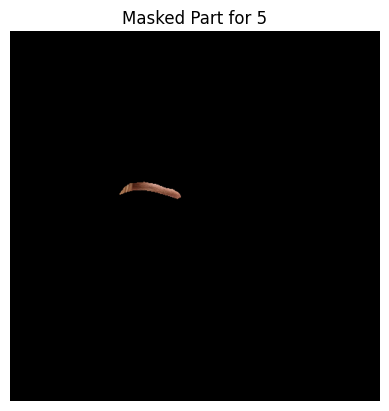

Prefix: 5, Mean: 105.61216735839844, Std: 46.38386535644531


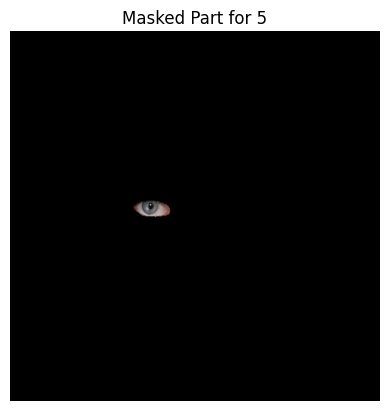

Prefix: 5, Mean: 135.44003295898438, Std: 53.388614654541016


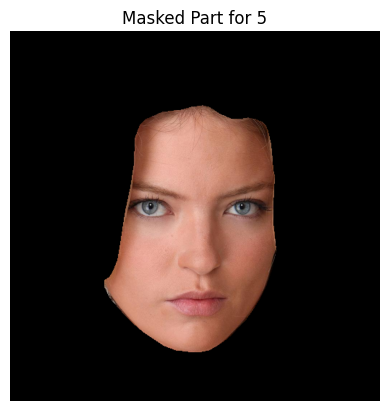

Prefix: 5, Mean: 111.76106262207031, Std: 48.34722137451172


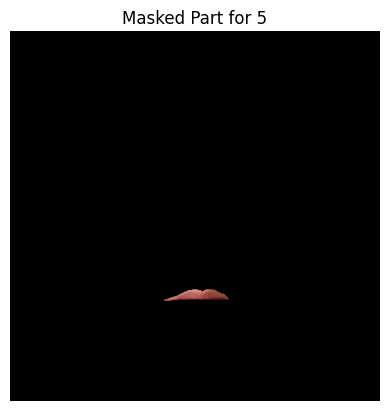

Prefix: 6, Mean: 33.81845474243164, Std: 35.969276428222656


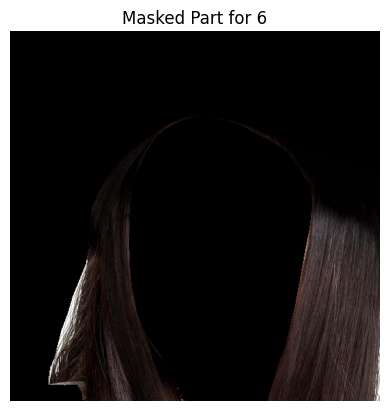

Prefix: 6, Mean: 78.50060272216797, Std: 89.2806625366211


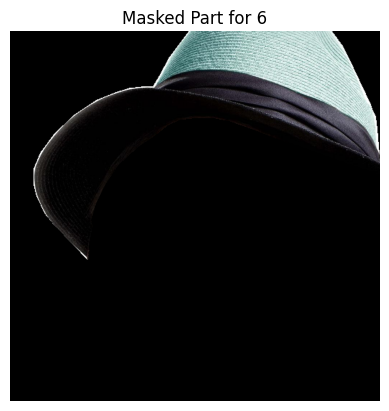

Prefix: 6, Mean: 68.18163299560547, Std: 21.887426376342773


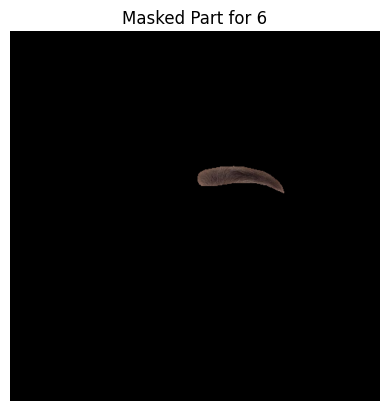

Prefix: 6, Mean: 26.167110443115234, Std: 33.81605911254883


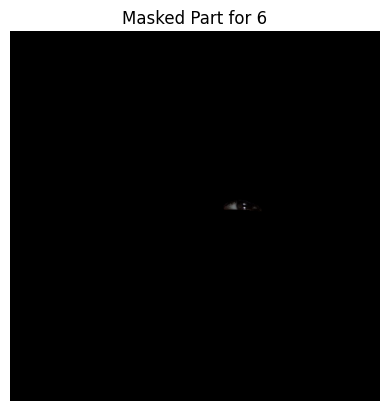

Prefix: 6, Mean: 127.42151641845703, Std: 68.25479125976562


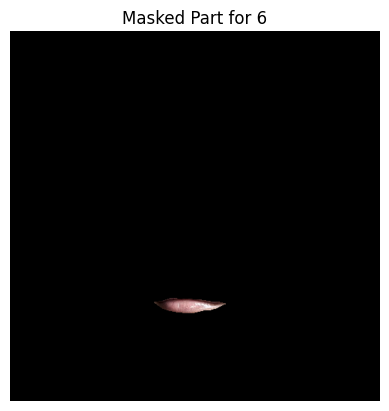

Prefix: 6, Mean: 67.94825744628906, Std: 38.948081970214844


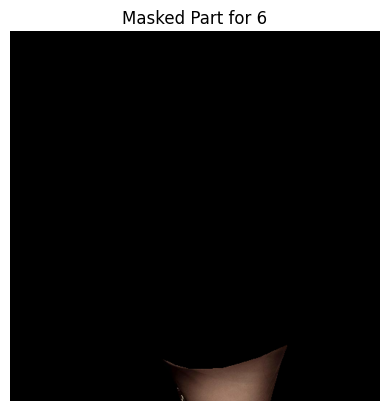

Prefix: 6, Mean: 158.0142364501953, Std: 67.92719268798828


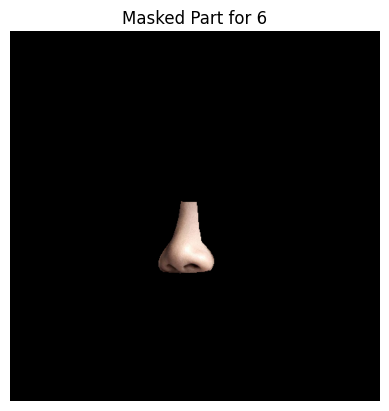

Prefix: 6, Mean: 29.512922286987305, Std: 23.25185203552246


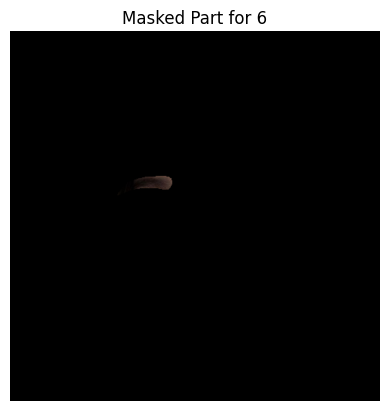

Prefix: 6, Mean: 23.27756118774414, Std: 30.459630966186523


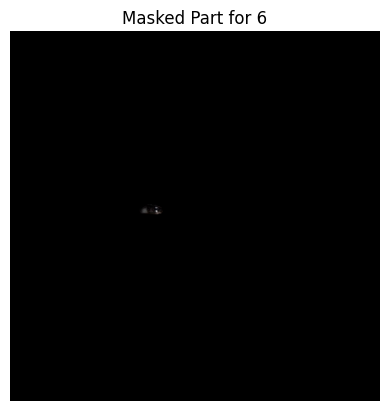

Prefix: 6, Mean: 119.25001525878906, Std: 69.42988586425781


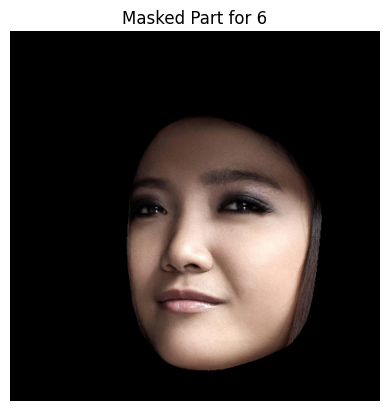

Prefix: 6, Mean: 84.90222930908203, Std: 47.71113586425781


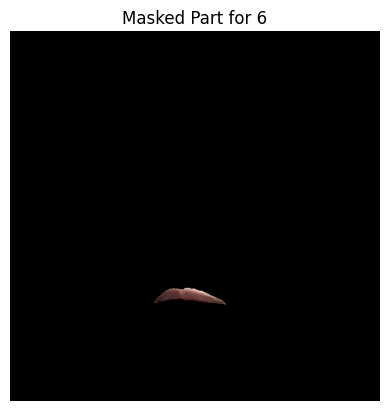

Prefix: 7, Mean: 121.54966735839844, Std: 63.016536712646484


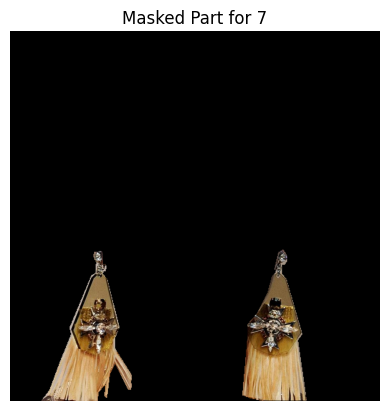

Prefix: 7, Mean: 69.03102111816406, Std: 49.454715728759766


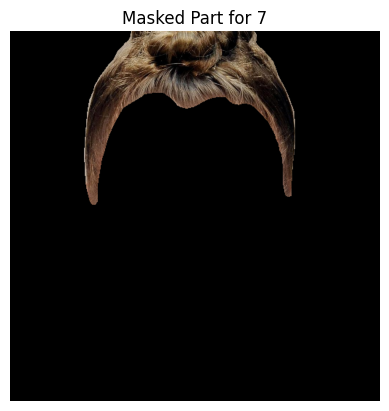

Prefix: 7, Mean: 109.11803436279297, Std: 40.0237922668457


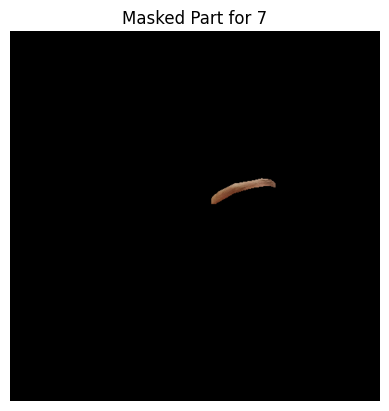

Prefix: 7, Mean: 134.71775817871094, Std: 47.27107238769531


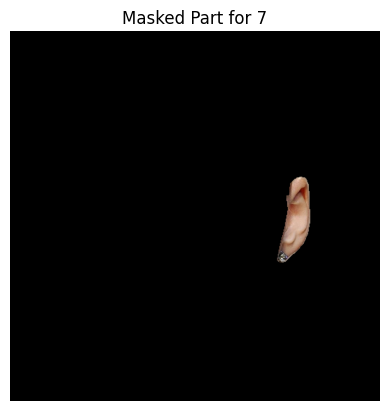

Prefix: 7, Mean: 68.12065124511719, Std: 51.93492889404297


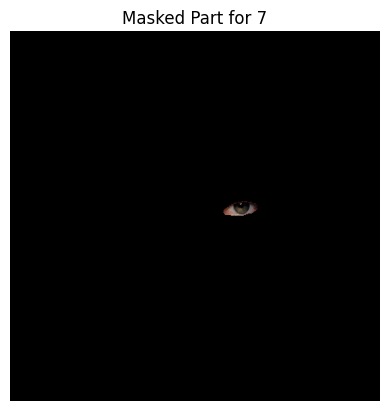

Prefix: 7, Mean: 118.7135009765625, Std: 54.009620666503906


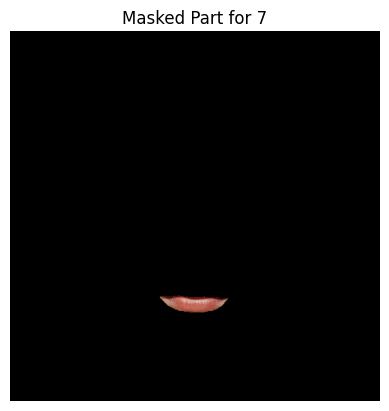

Prefix: 7, Mean: 102.14739227294922, Std: 41.019107818603516


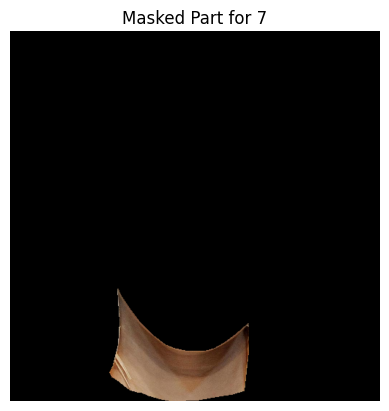

Prefix: 7, Mean: 160.90562438964844, Std: 49.89601135253906


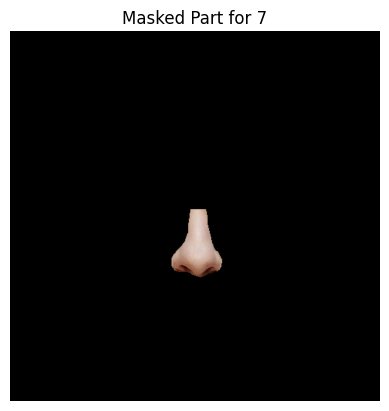

Prefix: 7, Mean: 115.34281158447266, Std: 41.1860237121582


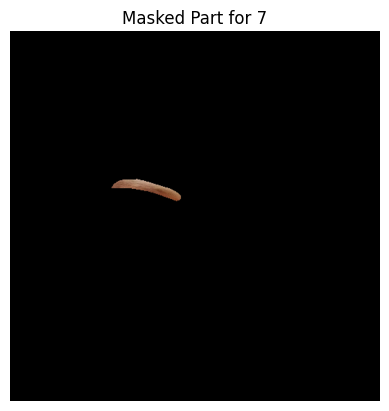

Prefix: 7, Mean: 126.99901580810547, Std: 47.35136413574219


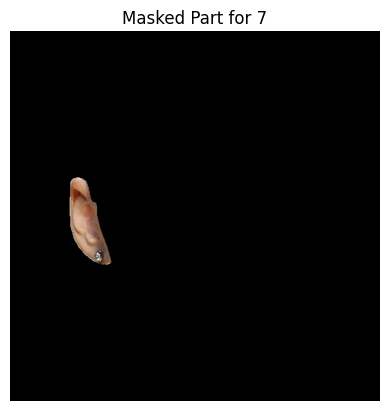

Prefix: 7, Mean: 74.58403778076172, Std: 50.47414779663086


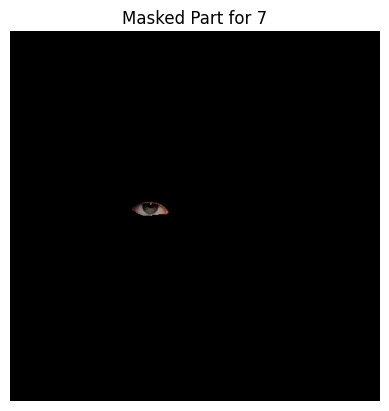

Prefix: 7, Mean: 143.2080535888672, Std: 48.69097137451172


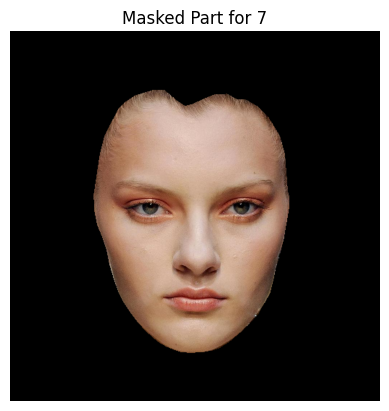

Prefix: 7, Mean: 105.11611938476562, Std: 56.241886138916016


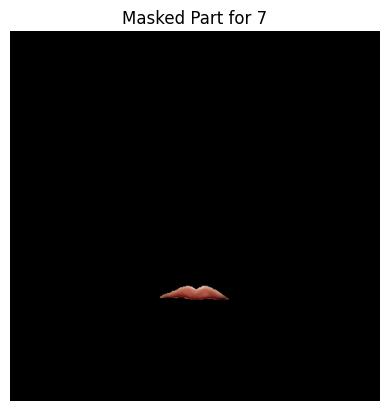

Prefix: 8, Mean: 66.60987091064453, Std: 42.2823600769043


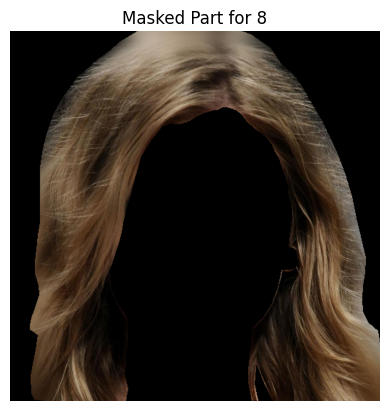

Prefix: 8, Mean: 63.572425842285156, Std: 33.37357711791992


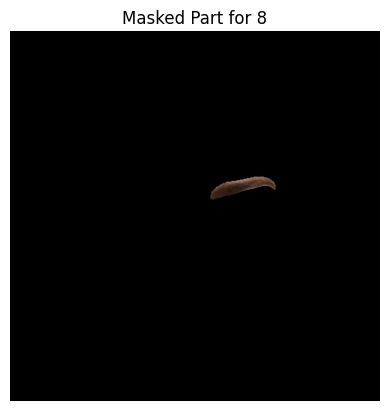

Prefix: 8, Mean: 39.26593780517578, Std: 42.1439208984375


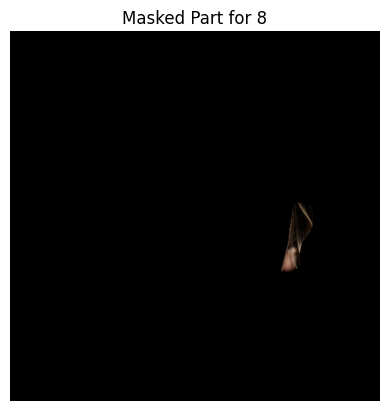

Prefix: 8, Mean: 30.769916534423828, Std: 37.8308219909668


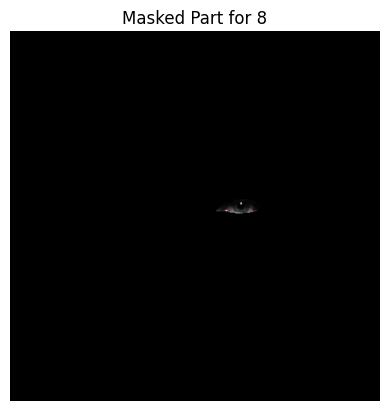

Prefix: 8, Mean: 103.2311782836914, Std: 45.37548065185547


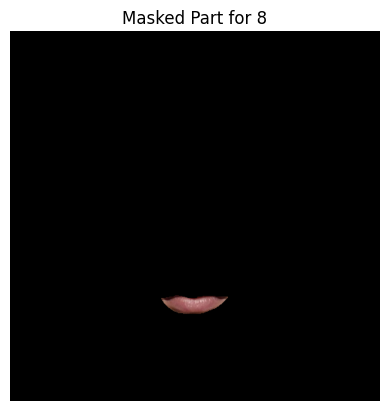

Prefix: 8, Mean: 42.685302734375, Std: 37.87904739379883


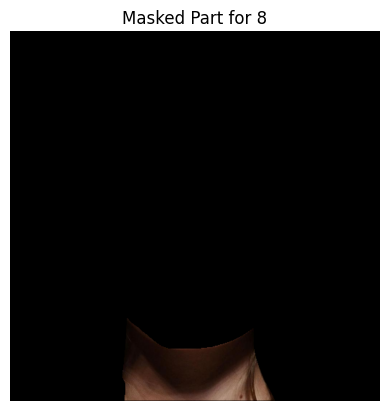

Prefix: 8, Mean: 125.88233947753906, Std: 54.76771545410156


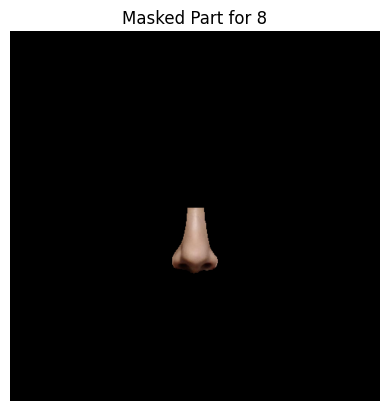

Prefix: 8, Mean: 47.576499938964844, Std: 30.16499137878418


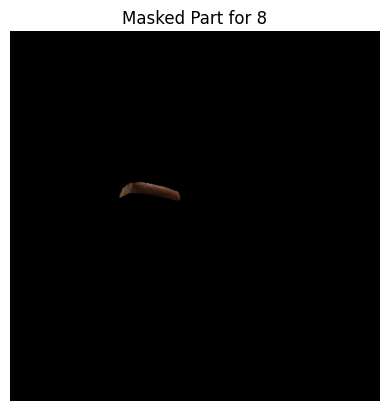

Prefix: 8, Mean: 26.103857040405273, Std: 34.12479782104492


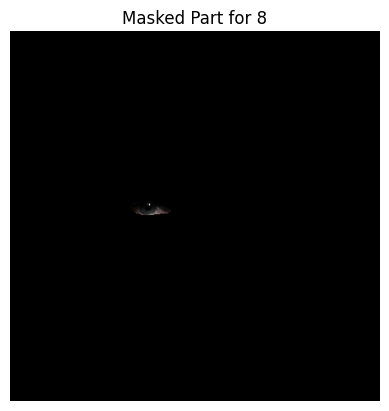

Prefix: 8, Mean: 106.63119506835938, Std: 51.49751281738281


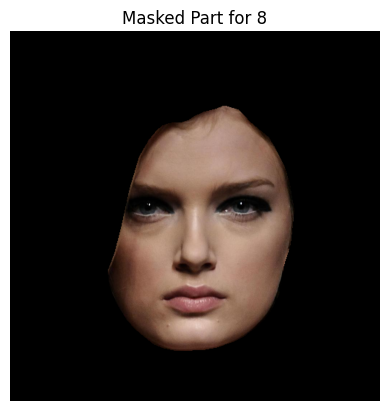

Prefix: 8, Mean: 79.67619323730469, Std: 47.29502487182617


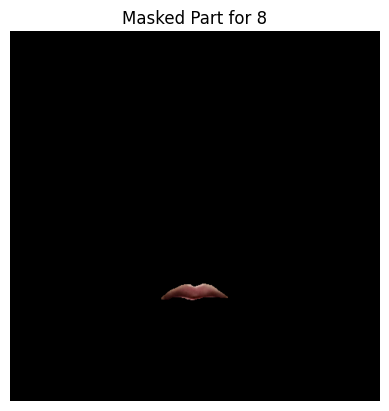

Prefix: 9, Mean: 130.85296630859375, Std: 107.45511627197266


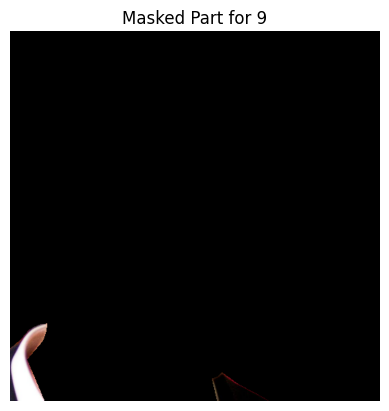

Prefix: 9, Mean: 45.01264572143555, Std: 46.36933898925781


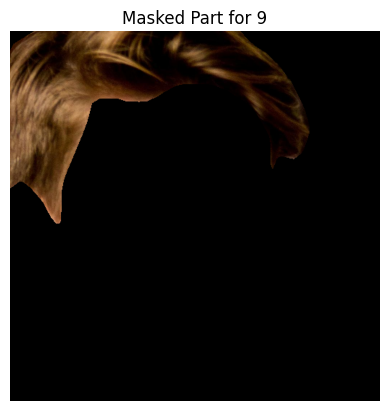

Prefix: 9, Mean: 47.553871154785156, Std: 44.50192642211914


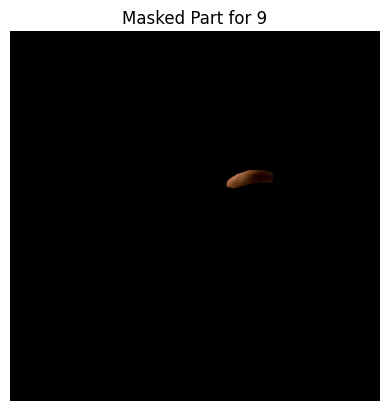

Prefix: 9, Mean: 25.44782829284668, Std: 24.748764038085938


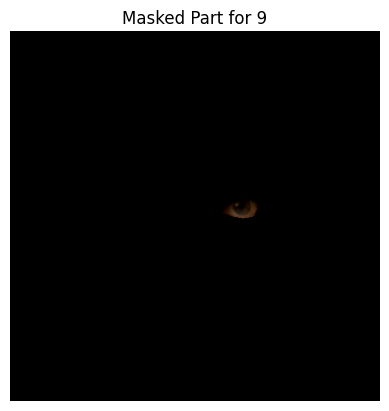

Prefix: 9, Mean: 103.77913665771484, Std: 69.2903060913086


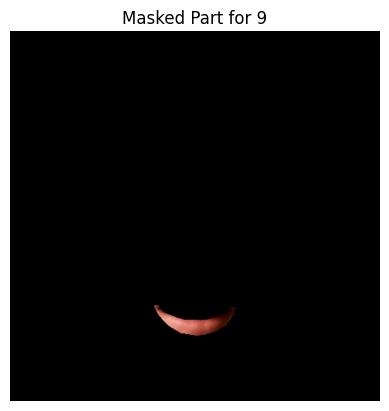

Prefix: 9, Mean: 75.6934585571289, Std: 53.63966751098633


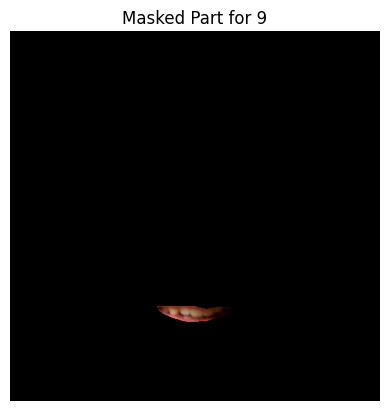

Prefix: 9, Mean: 151.8961639404297, Std: 59.843387603759766


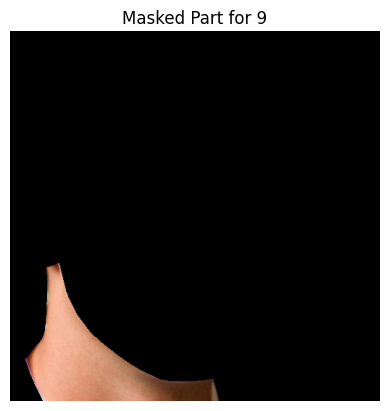

Prefix: 9, Mean: 155.32212829589844, Std: 70.83967590332031


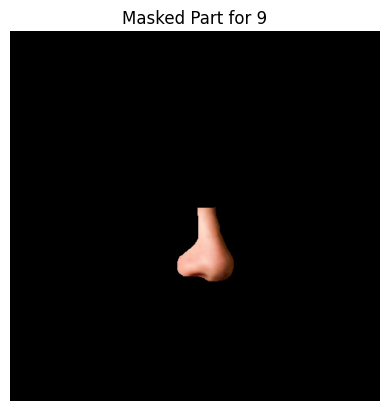

Prefix: 9, Mean: 115.0278091430664, Std: 60.01738357543945


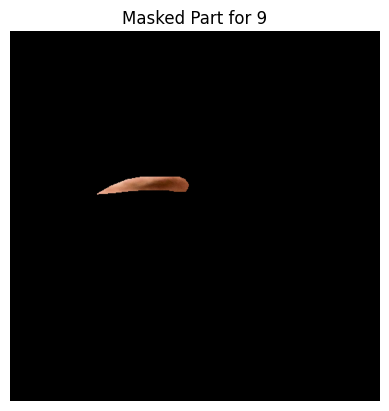

Prefix: 9, Mean: 166.35818481445312, Std: 64.41014862060547


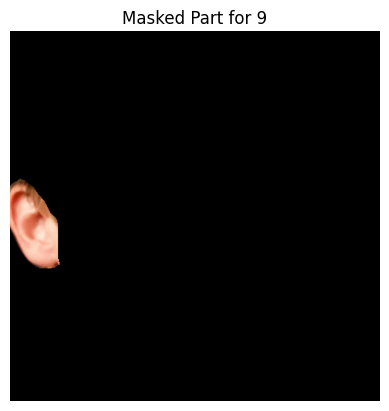

Prefix: 9, Mean: 71.21106719970703, Std: 54.081329345703125


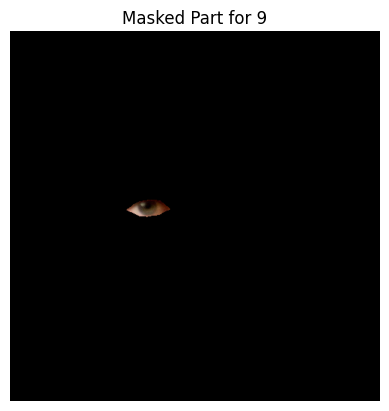

Prefix: 9, Mean: 132.33018493652344, Std: 72.55461883544922


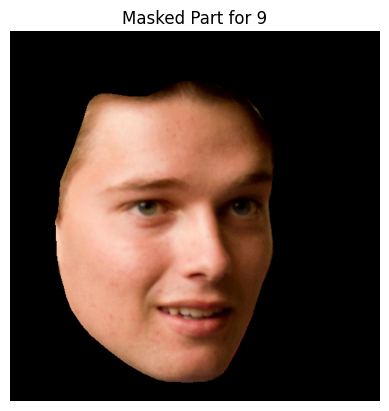

Prefix: 9, Mean: 82.65228271484375, Std: 58.70809555053711


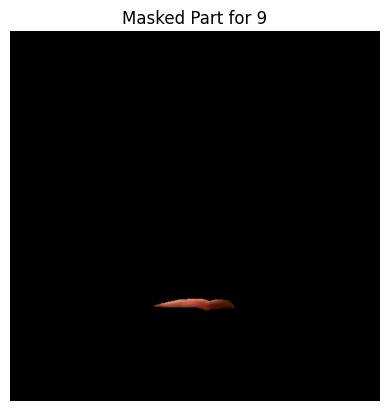

In [7]:
for main_file in os.listdir(img_dir):
    prefix = main_file.split(".",1)[0]
    for file in os.listdir(mask_dir):
        mask = []
        if file.startswith(f"0000{prefix}_"):
            main_img = cv2.imread(os.path.join(img_dir, main_file))
            mask_img = cv2.imread(os.path.join(mask_dir, file))
            mask_img = cv2.resize(mask_img, (main_img.shape[1], main_img.shape[0]))

            mask_img = (mask_img > 0).astype(np.float32)
            masked_img = main_img * mask_img 

            masked_pixels = masked_img[mask_img > 0]  # Get non-zero pixels (masked area)
            mean_val = np.mean(masked_pixels, axis=0)  # Mean value of the pixels under the mask
            std_val = np.std(masked_pixels, axis=0)    # Standard deviation of the pixels under the mask
            
            print(f"Prefix: {prefix}, Mean: {mean_val}, Std: {std_val}")

            if masked_pixels.size > 0:
                masked_image_show = np.zeros_like(main_img)
                masked_image_show[mask_img > 0] = main_img[mask_img > 0]  # Assign only the masked part
                
                plt.figure()
                plt.imshow(cv2.cvtColor(masked_image_show, cv2.COLOR_BGR2RGB))
                plt.title(f"Masked Part for {prefix}")
                plt.axis("off")
                plt.show()
            
            
            mask.append(mask_img)



In [16]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

features = {
    'eyes': ['l_eye', 'r_eye'],
    'ear': ['l_ear', 'r_ear'],
    'brow': ['l_brow', 'r_brow'],
    'mouth': ['l_lip', 'r_lip', 'mouth'],
    'neck': ['neck'],
    'nose': ['nose']
}

output_dir = "New_masked"
os.makedirs(output_dir, exist_ok=True)

for main_file in os.listdir(img_dir):
    prefix = main_file.split(".", 1)[0]
    if int(prefix) < 9:
        prefix = "0" + prefix 

    print(f"Processing image: {main_file}")
    
    mask = {feature: [] for feature in features.keys()}
    
    for file in os.listdir(mask_dir):
        if file.startswith(f"000{prefix}_"):
            class_name = file.split("_", 1)[1].split(".")[0]
            for feature, classes in features.items():
                if class_name in classes:
                    print(f"Processing mask: {file} for feature {feature}")
                    
                    main_img = cv2.imread(os.path.join(img_dir, main_file))
                    mask_img = cv2.imread(os.path.join(mask_dir, file), cv2.IMREAD_GRAYSCALE)
                    
                    # Resize and threshold the mask
                    mask_img = cv2.resize(mask_img, (main_img.shape[1], main_img.shape[0]))
                    _, mask_img = cv2.threshold(mask_img, 1, 255, cv2.THRESH_BINARY)
                    
                    # Debug mask content
                    print(f"Unique values in mask image: {np.unique(mask_img)}")
                    
                    mask[feature].append(mask_img)
    
    for feature, mask_list in mask.items():
        if mask_list:
            combined_mask = np.zeros_like(mask_list[0], dtype=np.uint8)
            for m in mask_list:
                combined_mask = cv2.bitwise_or(combined_mask, m.astype(np.uint8))
            
            # Debug combined mask
            print(f"Feature: {feature}, Combined mask unique values: {np.unique(combined_mask)}")
            
            output_path = os.path.join(output_dir, f"0000{prefix}_{feature}.png")
            if cv2.imwrite(output_path, combined_mask):
                print(f"Saved combined mask for {feature} at {output_path}")
            else:
                print(f"Failed to save mask for {feature} at {output_path}")



Processing image: 0.jpg
Processing mask: 00000_l_brow.png for feature brow
Unique values in mask image: [  0 255]
Processing mask: 00000_l_eye.png for feature eyes
Unique values in mask image: [  0 255]
Processing mask: 00000_l_lip.png for feature mouth
Unique values in mask image: [  0 255]
Processing mask: 00000_mouth.png for feature mouth
Unique values in mask image: [  0 255]
Processing mask: 00000_neck.png for feature neck
Unique values in mask image: [  0 255]
Processing mask: 00000_nose.png for feature nose
Unique values in mask image: [  0 255]
Processing mask: 00000_r_brow.png for feature brow
Unique values in mask image: [  0 255]
Processing mask: 00000_r_eye.png for feature eyes
Unique values in mask image: [  0 255]
Feature: eyes, Combined mask unique values: [  0 255]
Saved combined mask for eyes at New_masked\000000_eyes.png
Feature: brow, Combined mask unique values: [  0 255]
Saved combined mask for brow at New_masked\000000_brow.png
Feature: mouth, Combined mask unique